In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                       

In [87]:
globaltemp=pd.read_csv("C:/Users/Phani deep/Desktop/PA2/GlobalLandTemperaturesByCountry.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
globaltemp.shape

(577462, 7)

In [89]:
globaltemp.describe()

,AverageTemperature,AverageTemperatureUncertainty,Unnamed: 4,Unnamed: 5
count,544811.000000,545550.000000,0.0,0.0
mean,17.193354,1.019057,NaN,NaN
std,10.953966,1.201930,NaN,NaN
min,-37.658000,0.052000,NaN,NaN
25%,10.025000,0.323000,NaN,NaN
50%,20.901000,0.571000,NaN,NaN
75%,25.814000,1.206000,NaN,NaN
max,38.842000,15.003000,NaN,NaN


In [90]:
globaltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
0,1743-11-01,4.384,2.294,Åland,NaN,NaN,Åland
1,1743-12-01,NaN,NaN,Åland,NaN,NaN,Afghanistan
2,1744-01-01,NaN,NaN,Åland,NaN,NaN,Africa
3,1744-02-01,NaN,NaN,Åland,NaN,NaN,Albania
4,1744-03-01,NaN,NaN,Åland,NaN,NaN,Algeria


In [91]:
USAtemp = globaltemp[globaltemp.Country=='United States']

In [92]:
USAtemp=USAtemp[["dt","AverageTemperature"]]

In [93]:
USAtemp.head()

,dt,AverageTemperature
554880,1768-09-01,15.420
554881,1768-10-01,8.162
554882,1768-11-01,1.591
554883,1768-12-01,-2.882
554884,1769-01-01,-3.952


In [49]:
usatemp=usatemp[['dt','AverageTemperature']]

In [94]:
USAtemp.dt=pd.to_datetime(USAtemp.dt)

In [95]:
USAtemp.index=USAtemp.dt

In [96]:
USAtemp['Year']=USAtemp["dt"].apply(lambda x:x.year)

In [97]:
USAtemp.groupby(['Year']).mean()

,AverageTemperature
Year,
1768,5.572750
1769,10.446500
1770,NaN
1771,NaN
1772,NaN
1773,NaN
1774,1.603000
1775,9.499167
1776,8.110000


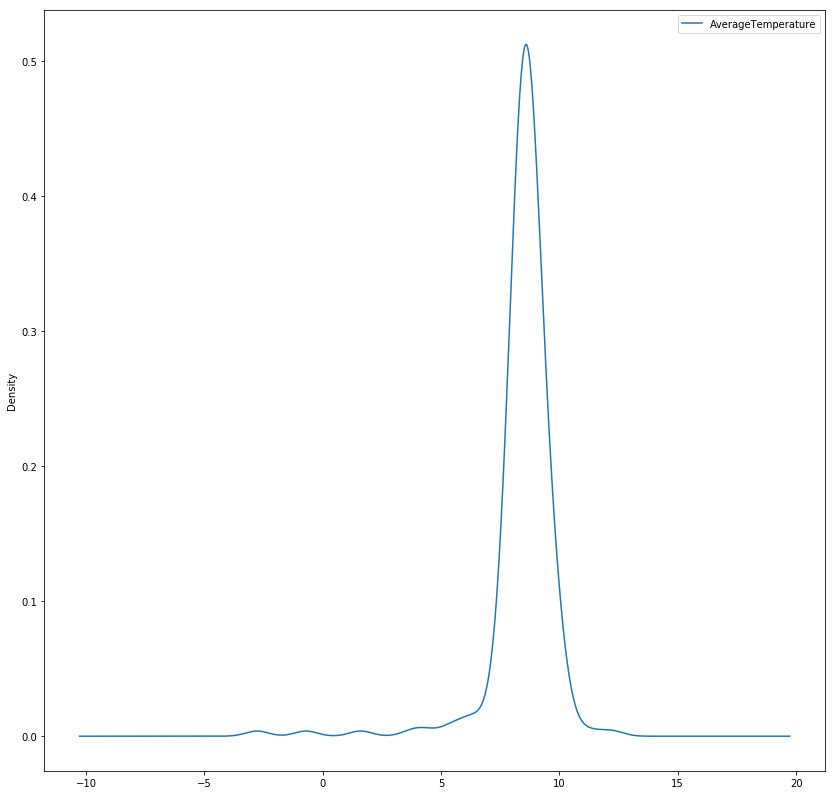

In [98]:
USAtemp.groupby(['Year']).mean().plot(kind="density", figsize=(14,14))

In [99]:
USAtemp1=USAtemp['1913':]

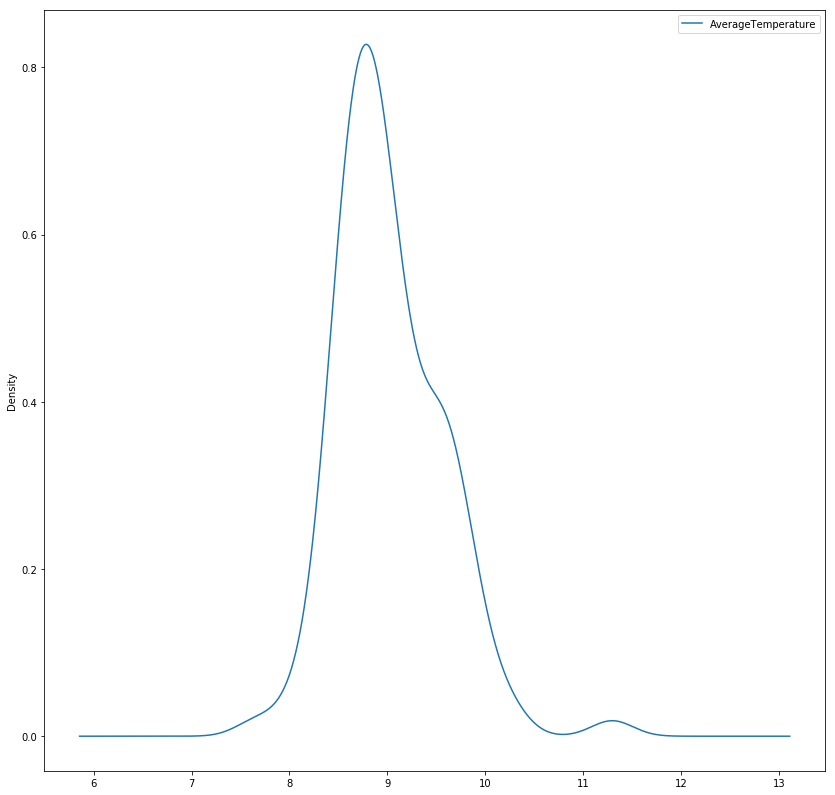

In [100]:
USAtemp1.groupby(['Year']).mean().plot(kind="density", figsize=(14,14))

In [101]:
USAtemp1=USAtemp1.dropna()

In [107]:
from statsmodels.tsa.stattools import adfuller

In [108]:
USAtempadf=adfuller(USAtemp1.AverageTemperature)

In [109]:
USAtempadf

(-3.8101695113511207,
 0.0028049646406320787,
 23,
 1185,
 {'1%': -3.4358803982852231,
  '10%': -2.5680702282397765,
  '5%': -2.8639821109786747},
 3322.078381332924)

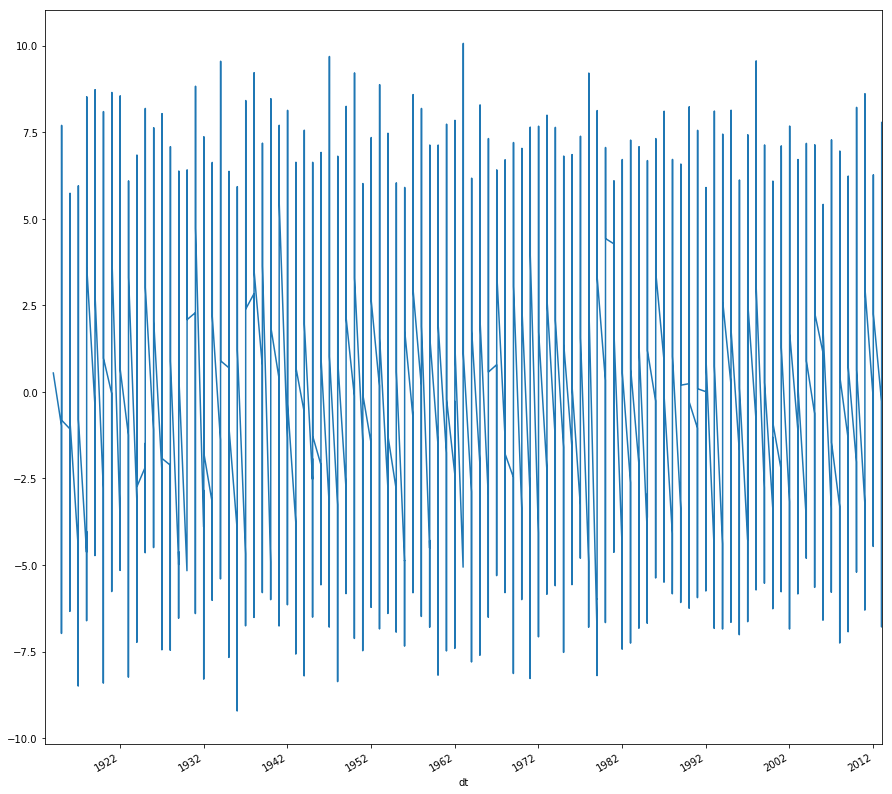

In [110]:
USAtemp1.AverageTemperature.diff(23).plot(kind="line",figsize=(15,15))

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

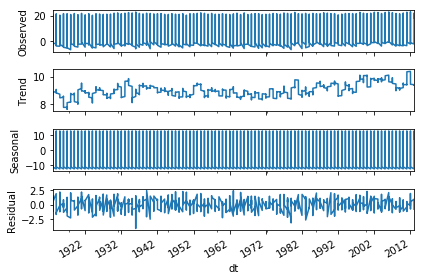

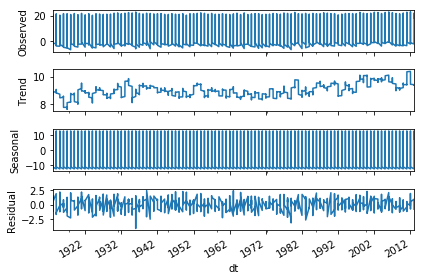

In [113]:
result = seasonal_decompose(USAtemp1.AverageTemperature, model='additive',freq=12)
result.plot()

In [116]:
from statsmodels.graphics.tsaplots import plot_acf

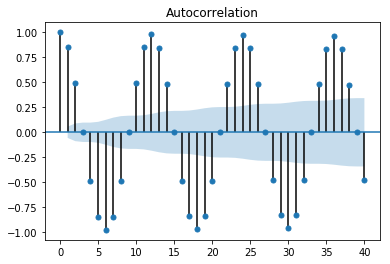

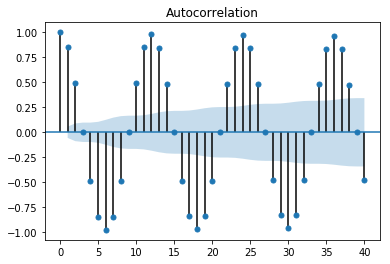

In [117]:
plot_acf(USAtemp1.AverageTemperature,lags=40)

In [118]:
from statsmodels.graphics.tsaplots import plot_pacf

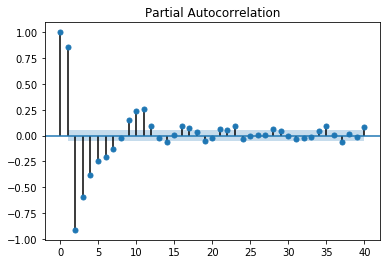

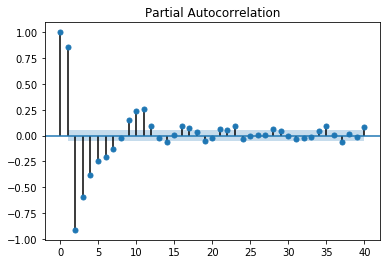

In [119]:
plot_pacf(USAtemp1.AverageTemperature,lags=40)

In [120]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [124]:
p=d=q=range(0,5)                                #to find out pdq automaticallynand see the results which have least AIC that is our pdq values
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(USAtemp1.AverageTemperature,order=param)
        results=mod.fit()
        print('ARIMA{}-AIC:{}'.format(param,results.aic))
    except:
        continue

ARIMA(0, 0, 0)-AIC:8720.581648513278
ARIMA(0, 0, 1)-AIC:7396.521169726435
ARIMA(0, 0, 4)-AIC:5703.385257975977
ARIMA(0, 1, 0)-AIC:7189.482700224638
ARIMA(0, 1, 1)-AIC:6428.280185131216
ARIMA(0, 1, 4)-AIC:5629.613909037531
ARIMA(0, 2, 0)-AIC:6179.478438099854
ARIMA(0, 2, 1)-AIC:6135.207350142558
ARIMA(0, 2, 2)-AIC:5943.726222541001
ARIMA(0, 2, 3)-AIC:5865.915798000056
ARIMA(0, 2, 4)-AIC:5851.996017304599
ARIMA(1, 0, 0)-AIC:7110.607776730556
ARIMA(1, 0, 1)-AIC:6318.052334143942
ARIMA(1, 0, 2)-AIC:7366.465970335375
ARIMA(1, 0, 3)-AIC:6518.969461560066
ARIMA(1, 0, 4)-AIC:5958.8993100238695
ARIMA(1, 1, 0)-AIC:6047.706665741663
ARIMA(1, 2, 0)-AIC:6106.025793550049
ARIMA(2, 0, 0)-AIC:4869.116241367695


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)-AIC:3644.9888477092136


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)-AIC:3533.8307364280495


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)-AIC:3527.3169762881253
ARIMA(2, 1, 0)-AIC:5841.254198861293


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)-AIC:3486.2710426739186
ARIMA(2, 2, 0)-AIC:6006.384818771487
ARIMA(3, 0, 0)-AIC:4309.967308076986


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check 

ARIMA(3, 0, 3)-AIC:3537.9457394198703


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)-AIC:3532.571975012115
ARIMA(3, 1, 0)-AIC:5283.860567845271
ARIMA(3, 2, 0)-AIC:5974.458862155693
ARIMA(4, 0, 0)-AIC:4101.2004715665735


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)-AIC:3535.831155181879
ARIMA(4, 0, 3)-AIC:3502.7055702970347
ARIMA(4, 1, 0)-AIC:4894.348039514834
ARIMA(4, 2, 0)-AIC:5729.618305935985


In [125]:
model=ARIMA(USAtemp1.AverageTemperature,order=(2,1,4), freq='M')
results=model.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [126]:
USAtemp1.tail()

,dt,AverageTemperature,Year
dt,,,
2013-01-05,2013-01-05,14.073,2013
2013-01-06,2013-01-06,20.198,2013
2013-01-07,2013-01-07,22.074,2013
2013-01-08,2013-01-08,21.168,2013
2013-01-09,2013-01-09,18.273,2013


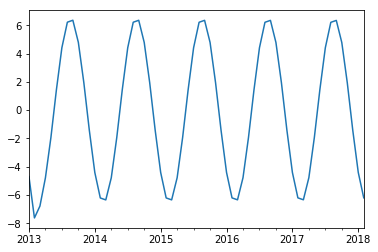

In [127]:
temppredict=results.predict('2013-01-09','2018-03-12')
temppredict.plot()

In [134]:
results.forecast(30)

(array([ 10.64511908,   3.85473355,  -0.93678599,  -2.87889145,
         -1.45112751,   2.9639458 ,   9.18332788,  15.54062796,
         20.33262008,  22.27563575,  20.84950066,  16.43686325,
         10.22059632,   3.86678077,  -0.92176621,  -2.86177434,
         -1.43335022,   2.98076931,   9.19783934,  15.55208875,
         20.34110904,  22.28202807,  20.85523325,  16.44354971,
         10.22959453,   3.87882906,  -0.90674683,  -2.844659  ,
         -1.41557561,   2.99758997]),
 array([ 1.01195072,  1.04774617,  1.04780663,  1.04781368,  1.04788328,
         1.0479435 ,  1.04794464,  1.04804353,  1.04854165,  1.04961307,
         1.05108688,  1.05251436,  1.05348054,  1.05388432,  1.05394441,
         1.05395139,  1.05402043,  1.05408013,  1.05408124,  1.05417969,
         1.05467497,  1.05573989,  1.05720446,  1.05862283,  1.0595828 ,
         1.05998397,  1.06004369,  1.06005062,  1.06011911,  1.06017829]),
 array([[  8.66173211,  12.62850605],
        [  1.8011888 ,   5.9082783 ]

In [135]:
temppredict

2013-01-31   -4.705202
2013-02-28   -7.627881
2013-03-31   -6.790386
2013-04-30   -4.791520
2013-05-31   -1.942105
2013-06-30    1.427764
2013-07-31    4.415073
2013-08-31    6.219382
2013-09-30    6.357300
2013-10-31    4.791992
2013-11-30    1.943016
2013-12-31   -1.426135
2014-01-31   -4.412637
2014-02-28   -6.216267
2014-03-31   -6.353816
2014-04-30   -4.788547
2014-05-31   -1.940008
2014-06-30    1.428424
2014-07-31    4.414120
2014-08-31    6.217070
2014-09-30    6.354249
2014-10-31    4.789020
2014-11-30    1.940919
2014-12-31   -1.426795
2015-01-31   -4.411684
2015-02-28   -6.213955
2015-03-31   -6.350765
2015-04-30   -4.785576
2015-05-31   -1.937912
2015-06-30    1.429083
                ...   
2015-09-30    6.351200
2015-10-31    4.786050
2015-11-30    1.938824
2015-12-31   -1.427454
2016-01-31   -4.410729
2016-02-29   -6.211644
2016-03-31   -6.347717
2016-04-30   -4.782606
2016-05-31   -1.935818
2016-06-30    1.429742
2016-07-31    4.412211
2016-08-31    6.212448
2016-09-30 